In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Indicators.csv')

In [3]:
print(len(df))
df.head()

5656458


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [4]:
df['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [5]:
for ind in df['IndicatorName'].unique():
    print(ind)

Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

In [3]:
indicators = [('Population, total','Population'),
              ('Adult literacy rate, population 15+ years, both sexes (%)','Literacy'),
              ('Unemployment, total (% of total labor force)','Unemployement'),
              ('Primary completion rate, both sexes (%)','Primary education')]

data = [df[df['IndicatorName']==ind[0]][['CountryName','Year','Value']] for ind in indicators]

for i,ind in enumerate(indicators):
    data[i].columns=['CountryName','Year',ind[1]]
    
[len(d) for d in data]

[13484, 737, 4944, 5386]

In [4]:
df = pd.merge(data[0],data[1],on=['CountryName','Year'],how='outer')
for i in range(2,len(data)):
    df = pd.merge(df,data[i],on=['CountryName','Year'],how='outer')
df

,CountryName,Year,Population,Literacy,Unemployement,Primary education
0,Arab World,1960,9.249590e+07,NaN,NaN,NaN
1,Caribbean small states,1960,4.190810e+06,NaN,NaN,NaN
2,Central Europe and the Baltics,1960,9.140158e+07,NaN,NaN,NaN
3,East Asia & Pacific (all income levels),1960,1.042475e+09,NaN,NaN,NaN
4,East Asia & Pacific (developing only),1960,8.964930e+08,NaN,NaN,NaN
5,Euro area,1960,2.653965e+08,NaN,NaN,NaN
6,Europe & Central Asia (all income levels),1960,6.674890e+08,NaN,NaN,NaN
7,Europe & Central Asia (developing only),1960,1.553174e+08,NaN,NaN,NaN
8,European Union,1960,4.094985e+08,NaN,NaN,NaN
9,Fragile and conflict affected situations,1960,1.203546e+08,NaN,NaN,NaN


<IPython.core.display.Javascript object>


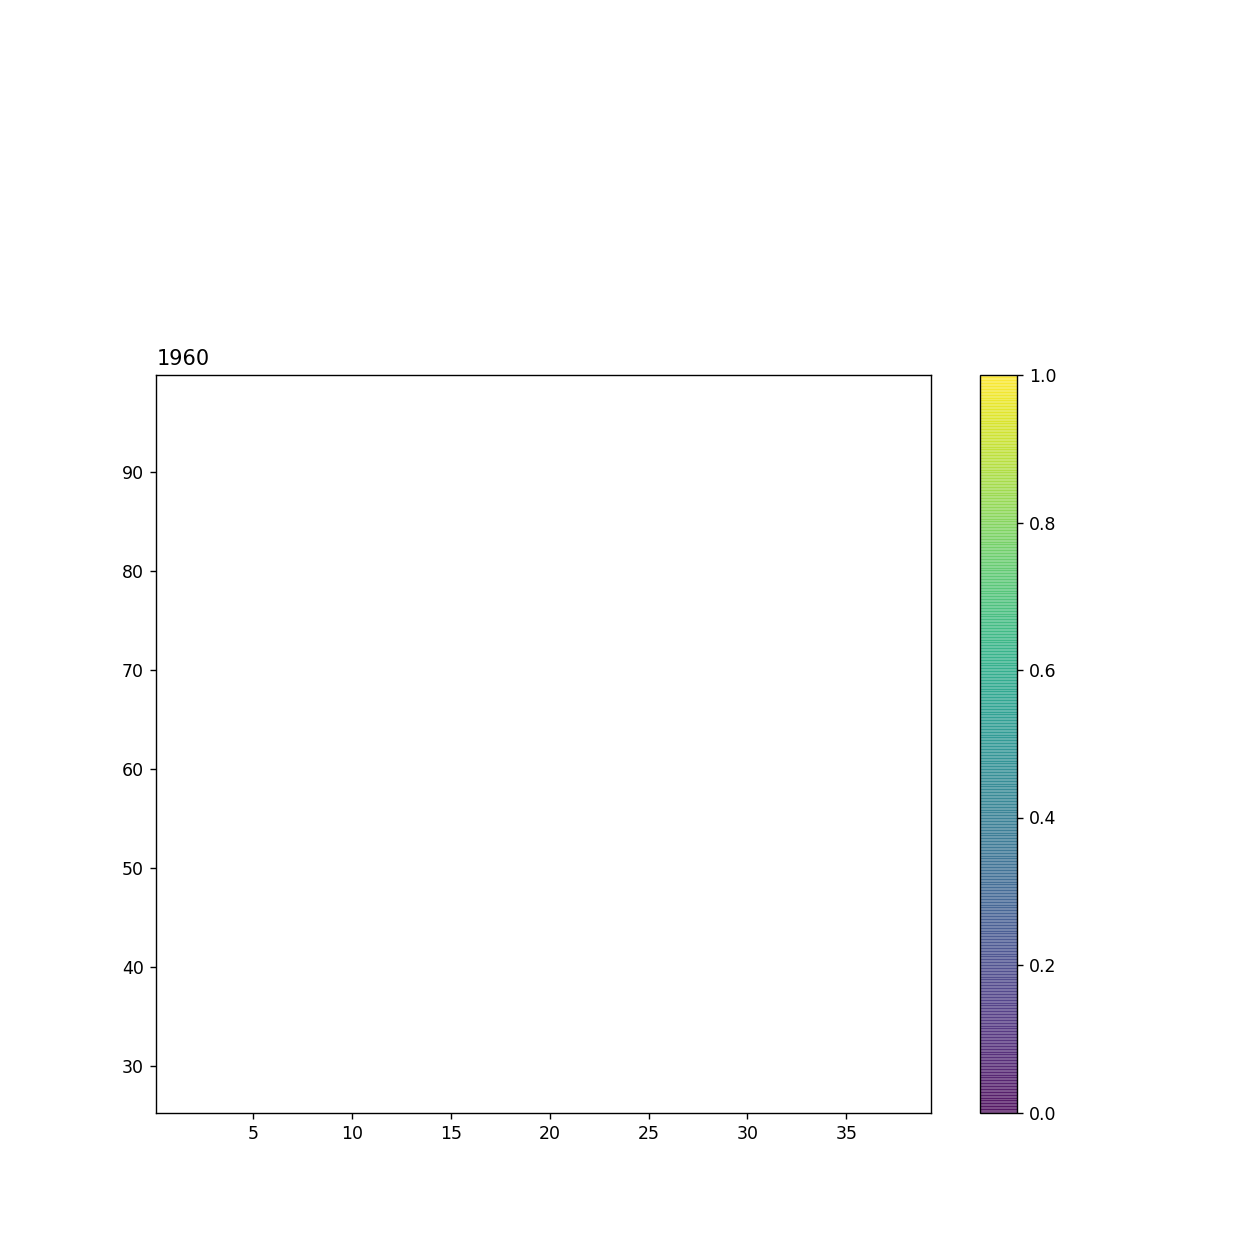

7

In [7]:
import math
import numpy as np
import matplotlib.cm as cm

year = 2014
d = df[df['Year']==year]

figure = plt.figure(figsize=(10,10))
plt.scatter(d['Unemployement'],
            d['Literacy'],
            s=np.sqrt(d['Population']/1000),
            c=d['Primary education'],
            alpha=0.7,
            picker=5
           )
plt.colorbar()
plt.subplots_adjust(top=0.7)

def onpick(event):
    index = event.ind[0]
    row = d.iloc[index]
    c = row['CountryName']
    y = row['Year']
    u = row['Unemployement']
    p = int(row['Population'])
    l = row['Literacy']
    pe = row['Primary education']
    #plt.gca().set_title(pe)
    s = 'Country: {}\nYear: {}\nUnemployement: {:.2f}%\nPopulation: {:d}\nLiteracy: {:.2f}%\nPrimary Education: {:.2f}%'.format(c,y,u,p,l,pe)
    plt.gca().set_title(s,loc='left')
    
plt.gcf().canvas.mpl_connect('pick_event', onpick)

<IPython.core.display.Javascript object>


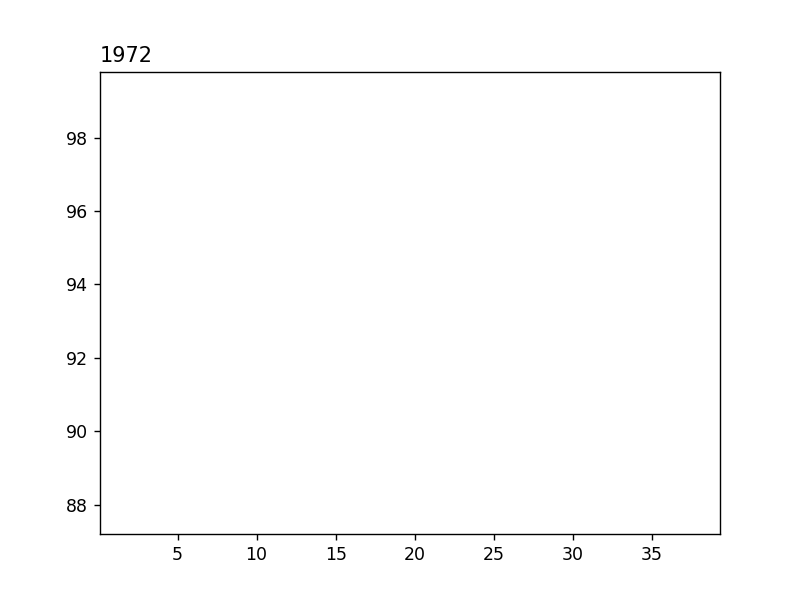

In [10]:
import matplotlib.animation as animation

un = [df['Unemployement'].min(), df['Unemployement'].max()]
li = [d['Literacy'].min(),d['Literacy'].max()]

def update(current):
    if current == df['Year'].max():
        a.event_source.stop()
    plt.cla()
    d = d = df[df['Year']==current]
    plt.scatter(d['Unemployement'],
                d['Literacy'],
                s=np.sqrt(d['Population']/1000),
                c=d['Primary education'],
                cmap='gnuplot',
                alpha=0.7,
                picker=5
               )
    plt.gca().set_xlim(un)
    plt.gca().set_ylim(li)
    plt.gca().set_title(current, loc='left')
    
fig = plt.figure()
a = animation.FuncAnimation(fig,
                            update,
                            interval=800,
                            frames=np.arange(df['Year'].min(),df['Year'].max())
                           )